# ASSIGNMENT 5: Visualizing Data Veracity Challenges in Multi-Label Classification

This assignment uses t-SNE and Isomap to visually analyze a high-dimensional dataset.

The goal is to identify data veracity issues and understand the underlying manifold structure, which are key challenges for classification models.

# PART A
# 1 & 2: Data Loading & Dimensionality Check


In [24]:
!pip install liac-arff

import arff
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/yeast/"

train_data = arff.load(open(path + "yeast-train.arff"))
test_data  = arff.load(open(path + "yeast-test.arff"))
full_data  = arff.load(open(path + "yeast.arff"))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
import numpy as np
from scipy.io import arff
from collections import Counter
from sklearn.preprocessing import StandardScaler

# data Loading
full_df = pd.DataFrame(full_data['data'], columns=[attr[0] for attr in full_data['attributes']])
label_names_list = [attr[0] for attr in full_data['attributes'][-14:]]

# split into features (X) and labels (Y)
n_labels = 14
X = full_df.iloc[:, :-n_labels].astype(float).values
Y = full_df.iloc[:, -n_labels:].astype(int).values

print("First sample of X (features):")
print(X[:1])
print("\nFirst sample of Y (labels):")
print(Y[:1])

print("\n 2.Dimensionality Check")
print("Number of samples (data points):", X.shape[0])
print("Number of features:", X.shape[1])
print("Number of labels:", Y.shape[1])
print("Label distribution (counts across dataset):")
print(Y.sum(axis=0))

First sample of X (features):
[[ 0.004168 -0.170975 -0.156748 -0.142151  0.058781  0.026851  0.197719
   0.04185   0.066938 -0.056617 -0.02723  -0.137411  0.067776  0.047175
   0.155671  0.050766  0.102557 -0.020259 -0.200512 -0.095371 -0.08194
  -0.103735  0.093299  0.105475  0.14856   0.085925  0.107879  0.108075
   0.085388  0.124026 -0.00365  -0.127376  0.039394 -0.018364  0.050378
   0.15719   0.203563  0.111552  0.017907 -0.001126  0.053062  0.140708
   0.137118 -0.090282 -0.067809 -0.102396 -0.051758  0.050665  0.007055
   0.021674  0.061283  0.083523  0.053235  0.001978  0.077418  0.046762
  -0.07573  -0.092787  0.127297 -0.178029 -0.202705 -0.028543  0.032891
   0.023189  0.009716 -0.169848 -0.002261 -0.133029  0.082378 -0.21661
   0.062425 -0.128243  0.203676  0.143642  0.178602  0.192041  0.154135
  -0.175325 -0.133636  0.005524 -0.014981 -0.031946 -0.015114 -0.047175
   0.003829  0.010967 -0.006062 -0.02756  -0.019866 -0.024046 -0.025153
  -0.009261 -0.025539  0.006166 -0.0

# Data loading and dimensionality results (Summary of dataset)

1. After the required installations, the yeast arff file is loaded and converted into a dataframe. The first X and Y labels (there are a total of 14 labels) are printed.

2. The dimensionality check reveals that we have:

- Number of samples : 2417
- Number of features: 103
- Number of labels: 14

- Further, the label distribution across the dataset is also printed to get an idea. The 12th label seems to occur the highest.

- Label distribution (counts across dataset):
[ 762 1038  983  862  722  597  428  480  178  253  289 1816 1799   34]

# A 3 & 4) Label Selection and Scaling

In [26]:
#single-label classes
single_label_mask = np.sum(Y, axis=1) == 1
single_labels_df = pd.DataFrame(Y[single_label_mask], columns=range(Y.shape[1]))
most_freq_single_labels_indices = single_labels_df.sum(axis=0).sort_values(ascending=False).index[:2]

#multi-label combination
multi_label_mask = np.sum(Y, axis=1) > 1
multi_labels_array = Y[multi_label_mask]
multi_label_combinations = [tuple(row) for row in multi_labels_array]
multi_label_counts = Counter(multi_label_combinations)
most_freq_multi_label_combo_tuple = multi_label_counts.most_common(1)[0][0]

print("Most frequent single-label classes selected:")
for idx in most_freq_single_labels_indices:
    print(f"- {label_names_list[idx]} (Index: {idx})")

print("\nMost frequent multi-label combination selected:")

combo_names = [label_names_list[i] for i, val in enumerate(most_freq_multi_label_combo_tuple) if val == 1]
print(f"- {' + '.join(combo_names)}")
print(f"  (Tuple: {most_freq_multi_label_combo_tuple})")

visual_labels = np.full(X.shape[0], 'Other', dtype='object')
label_names_vis = [f"Single-Label_{label_names_list[i]}" for i in most_freq_single_labels_indices]
for i, label_idx in enumerate(most_freq_single_labels_indices):
    visual_labels[(Y[:, label_idx] == 1) & single_label_mask] = label_names_vis[i]
most_freq_combo_mask = np.all(Y == np.array(most_freq_multi_label_combo_tuple), axis=1)
visual_labels[most_freq_combo_mask] = "Most_Freq_Combo"

print("\nUnique visualization categories:", np.unique(visual_labels))
print("Counts of visualization categories:")
print(pd.Series(visual_labels).value_counts())

#scaling
print("4. Scaling")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Mean of scaled features : {np.round(X_scaled.mean(), 4)}")
print(f"Std of scaled features : {np.round(X_scaled.std(), 4)}")
print("First scaled sample:")
print(X_scaled[:1])

Most frequent single-label classes selected:
- Class1 (Index: 0)
- Class2 (Index: 1)

Most frequent multi-label combination selected:
- Class3 + Class4 + Class12 + Class13
  (Tuple: (np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0)))

Unique visualization categories: ['Most_Freq_Combo' 'Other' 'Single-Label_Class1']
Counts of visualization categories:
Other                  2148
Most_Freq_Combo         237
Single-Label_Class1      32
Name: count, dtype: int64
4. Scaling
Mean of scaled features : 0.0
Std of scaled features : 1.0
First scaled sample:
[[ 0.0307518  -1.74259084 -1.60132582 -1.46897973  0.59400999  0.27111663
   2.02380162  0.42806962  0.68388467 -0.58488988 -0.28526367 -1.42209892
   0.68435224  0.46901501  1.58550377  0.51609756  1.02963972 -0.21001199
  -2.00275359 -0.97946836 -0.83174965 -1.04547517  0.90464692  1.0327083
   1.47201886  0.8

# Explanation of label selection:

**Here are the steps followed for label selection:**

- Identify single-label samples: We ount the number of active labels per sample and select only those samples that have exactly one active label.

- Select top single-label classes: For these single-label samples, we count the occurrences of each label across all samples and choose the two most frequent labels.

- Identify multi-label samples: We select samples that have more than one active label.

- Select top multi-label combination: We convert each multi-label sample to a tuple and count the frequency of each unique combination. Choose the most frequent combination.

- Initialize all samples as "Other": This provides a default category for all remaining samples.

- Assign simplified labels:

If a sample belongs to one of the two most frequent single-label classes, we label it "Single-Label_<name>".

If a sample exactly matches the most frequent multi-label combination, we label it "Most_Freq_Combo".

- Result: A reduced categorical target variable is obtained, consisting of three main categories (Single-Label_<name>, Most_Freq_Combo, and Other) that simplify coloring and interpretation in visualization plots.


# Result:

**Here, only Class 1 is taken for single label and a the multilabel consisting of class 3 + 4 + 12 + 13 is considered as shown above**

# Why do we perform feature scaling?

- Scaling is necessary before applying distance-based dimensionality reduction techniques such as t-SNE and Isomap since the methods rely on the computation of distances between data points.

- If features have different magnitudes or variances, those with larger values will dominate the distance calculations, leading to a distorted representation of the data’s underlying structure.

- Standardization (scaling to zero mean and unit variance) ensures that all features contribute equally to the distance metrics, preserving the true geometric relationships in the dataset.

- After standardization, the feature matrix has a mean close to 0 and a standard deviation close to 1, which is suitable for distance-based methods, as shown in the methods.

# PART B
# B 1) tSNE with perplexity paramater

Applying perplexity = 5


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Applying perplexity = 10


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Applying perplexity = 20


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Applying perplexity = 30


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Applying perplexity = 40


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Applying perplexity = 50


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


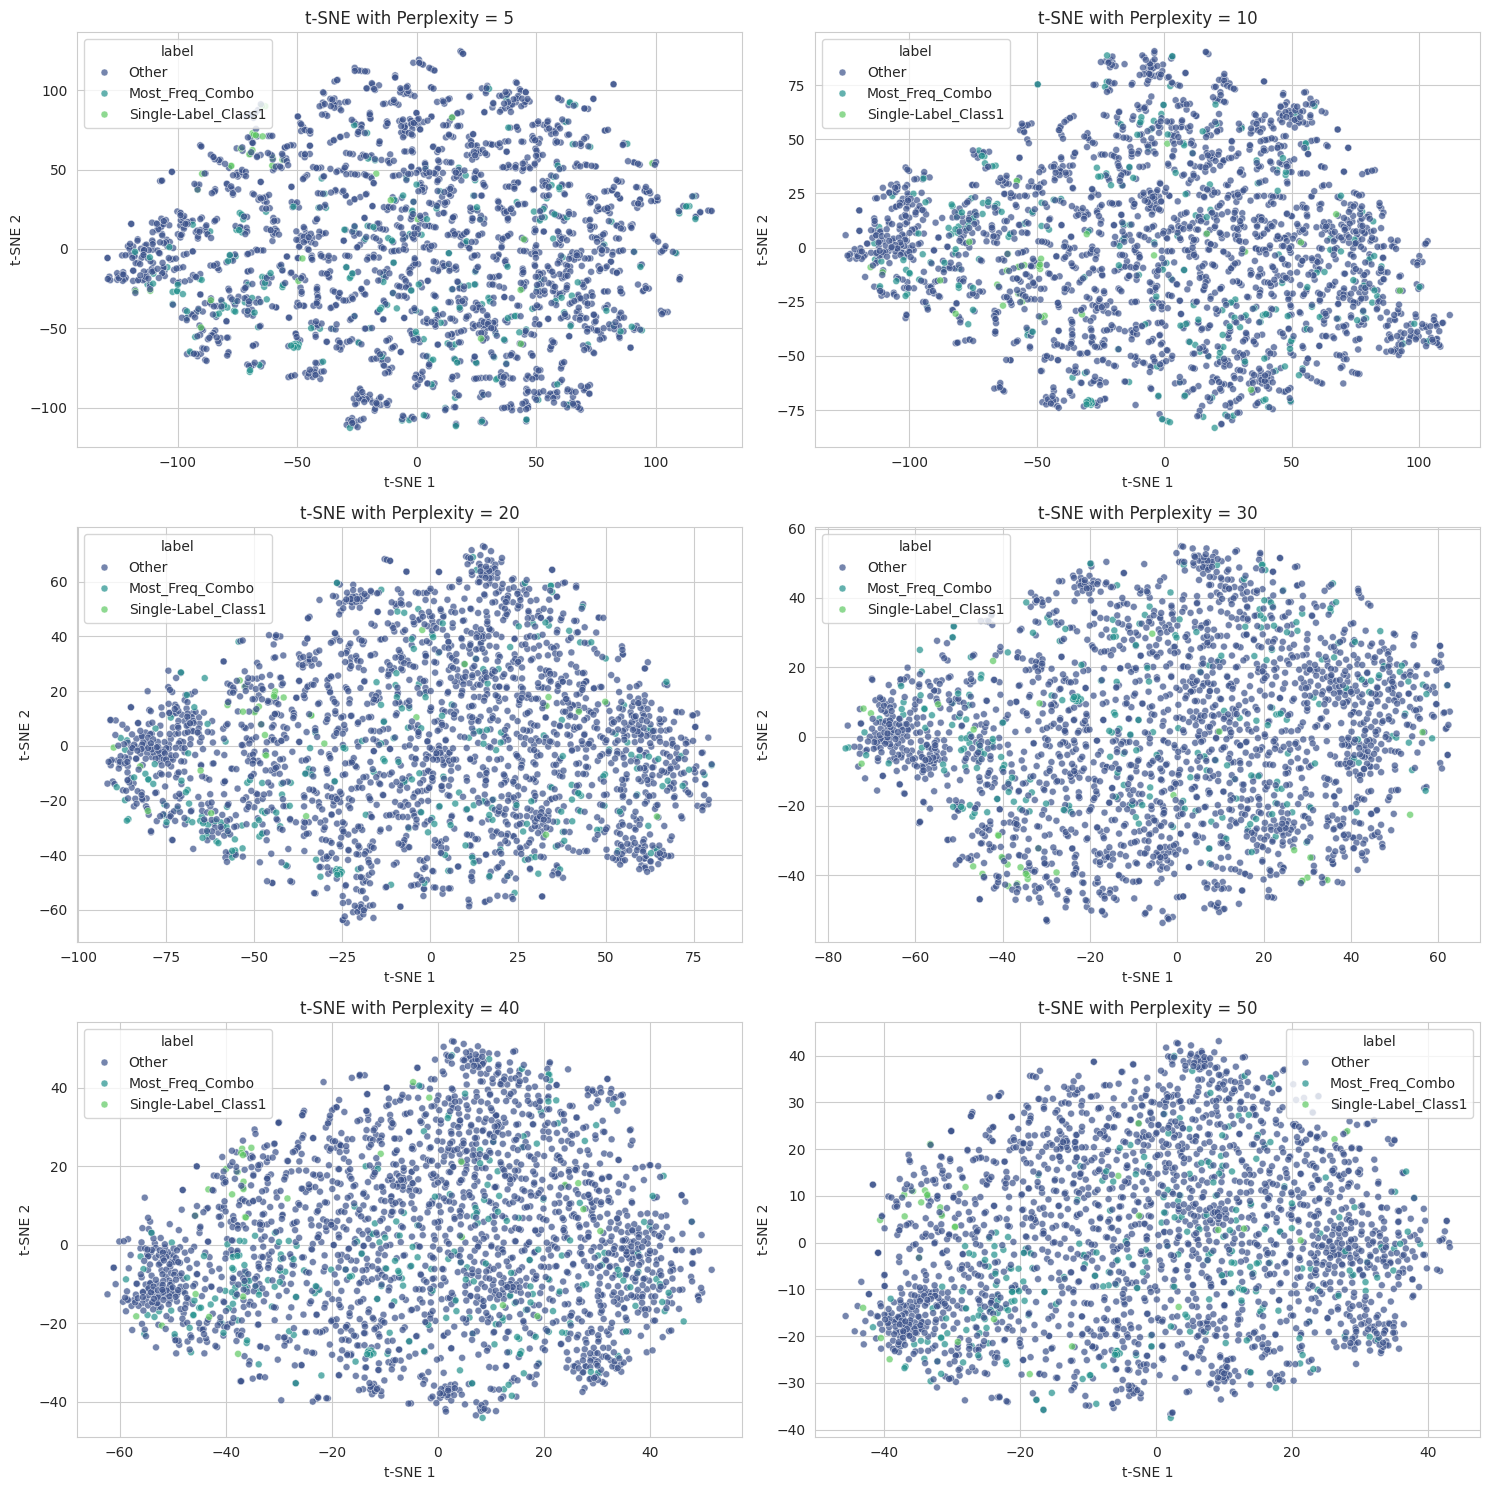

In [27]:
perplexities = [5, 10, 20, 30, 40, 50]
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, perplexity in enumerate(perplexities):
    print(f"Applying perplexity = {perplexity}")
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, n_iter=3000)
    X_tsne = tsne.fit_transform(X_scaled)

    row = i // 2
    col = i % 2
    ax = axes[row, col]

    tsne_df = pd.DataFrame(X_tsne, columns=['tSNE-1', 'tSNE-2'])
    tsne_df['label'] = visual_labels

    sns.scatterplot(
        x='tSNE-1', y='tSNE-2',
        hue='label',
        palette='viridis',
        data=tsne_df,
        ax=ax,
        alpha=0.7,
        s=25
    )
    ax.set_title(f"t-SNE with Perplexity = {perplexity}")
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')

plt.tight_layout()
plt.show()

# Choice of perplexity paramater and tSNE

**What is tSNE**

- t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear dimensionality reduction technique that maps high-dimensional data into a lower-dimensional space (2D or 3D) while preserving the local structure of the data.

- It achieves this by converting pairwise distances in high dimensions into probabilities representing similarities, and then minimizes the divergence between these probabilities in the low-dimensional space.

**Mathematical formula of tSNE**

**1. High-dimensional similarities**

For each pair of high-dimensional points $x_i$ and $x_j$, compute the **conditional probability** that point $x_j$ would be picked as a neighbor of point $x_i$:

$
p_{j|i} = \frac{\exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma_i^2}\right)}{\sum_{k \neq i} \exp\left(-\frac{\|x_i - x_k\|^2}{2\sigma_i^2}\right)}
$

- $\sigma_i$ is a bandwidth parameter chosen using a **perplexity** value.

Then symmetrize the probabilities:

$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2N}
$

where $N$ is the number of data points.

---

**2.Low-dimensional similarities**

For the corresponding low-dimensional points $y_i$ and $y_j$, define the similarity as a **Student t-distribution with one degree of freedom** (Cauchy distribution):

$
q_{ij} = \frac{\left(1 + \|y_i - y_j\|^2\right)^{-1}}{\sum_{k \neq l} \left(1 + \|y_k - y_l\|^2\right)^{-1}}
$

---

**3.Cost Function (KL Divergence)**

The cost function minimized by t-SNE is the **Kullback-Leibler divergence** between the high-dimensional and low-dimensional similarity distributions:

$
C = KL(P \| Q) = \sum_{i \neq j} p_{ij} \log \left( \frac{p_{ij}}{q_{ij}} \right)
$

- The optimization is typically done using **gradient descent**.


**Explanation of method:**
- In this implementation, t-SNE was applied to the scaled feature matrix X of the yeast dataset to reduce it to 2 dimensions for visualization. The perplexity hyperparameter, which roughly represents the effective number of nearest neighbors considered for each point, was varied with values 5, 30, and 50 to observe its effect on the resulting plots.

**Choice of perplexity paramater**

- Perplexity is a hyperparameter that can be thought of as a soft measure of the number of effective nearest neighbors a data point has.

- It influences the trade-off between preserving local and global structures.

- A low perplexity value (5/10) forces t-SNE to focus on local neighborhoods.
This can lead to fragmented clusters and can make it difficult to see the overall structure, as a high number of small, tight clusters may appear.

- A high perplexity value (40/50) allows t-SNE to consider more neighbors, revealing a broader, more global structure. This can be useful for seeing large-scale patterns but may obscure fine-grained local details.

- A moderate perplexity value(20/30), typically between 20 and 50, often provides a good balance, revealing meaningful clusters that are neither overly fragmented nor completely merged.

In our visualizations, a perplexity of **30** appears to provide the most informative view. They show distinct clusters for the selected labels, with some mixing that suggests data veracity issues like ambiguous or hard-to-learn samples. A perplexity of 5 results in scattered, less coherent groupings.

***Therefore, for further analysis, a perplexity of 30 would be a strong, balanced choice.***

**Hence chosen value = 30**

# B 2) Visualisation of tSNE plot

The visualization uses t-SNE to reduce the high-dimensional scaled data (X_scaled) into two dimensions. A scatter plot is then created with where points are colored based on their labels, allowing us to visually assess clustering or group separation.

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


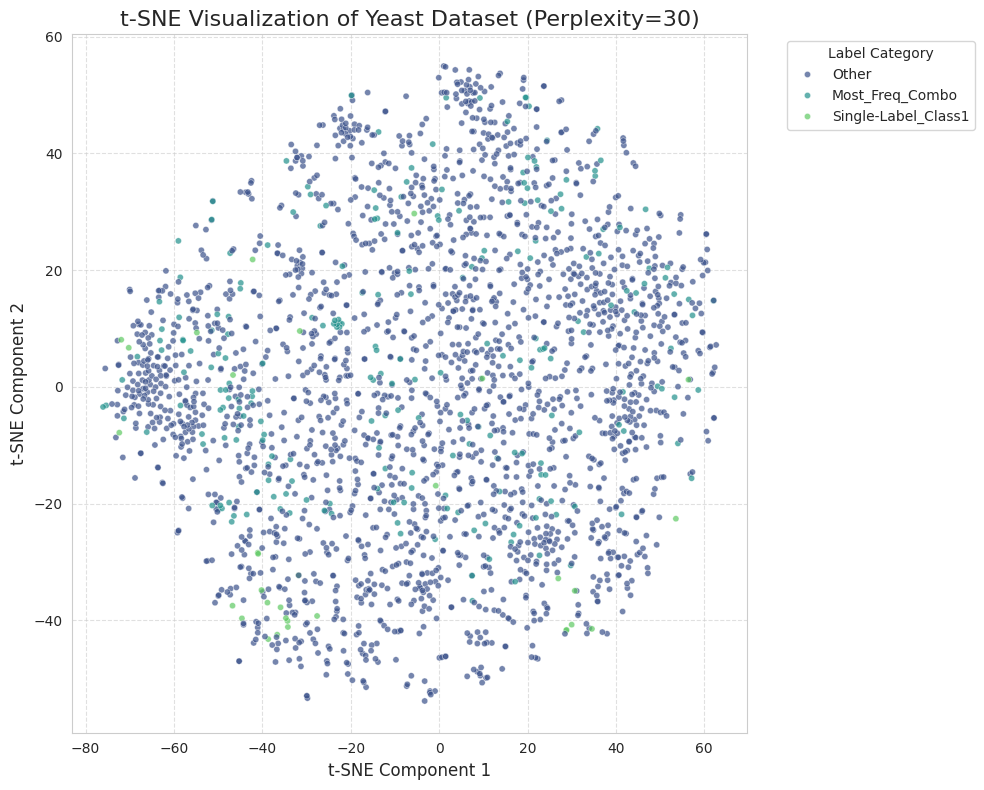

In [28]:
final_perplexity = 30
tsne = TSNE(n_components=2, perplexity=final_perplexity, random_state=42, n_iter=3000)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['tSNE-1', 'tSNE-2'])
tsne_df['label'] = visual_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='tSNE-1',
    y='tSNE-2',
    hue='label',
    palette='viridis',  # viridis is used as the color palette for categorical data
    data=tsne_df,
    alpha=0.7,
    s=20
)

plt.title(f't-SNE Visualization of Yeast Dataset (Perplexity={final_perplexity})', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.legend(title='Label Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# B 3) Veracity Inspection

# 1. **Noisy/Ambiguous Labels**
(Points where one color is deeply embedded within a cluster of a different color)

- Location: The plot shows a high degree of intermixing, particularly between the Other (dark blue) and Most_Freq_Combo (teal) categories.

- There are no single, distinct clusters of one color with another color deeply embedded; instead, the two are thoroughly intertwined across the entire plot. This suggests that the categories are not well-defined, and many points could plausibly belong to either label.

- This pervasive overlap indicates potential ambiguity in the original functional labels, rather than a few isolated mislabeled points.

# 2. **Outliers**
(Isolated points or tiny, distant clusters. Hypothesize what these unusual expression patterns might represent)

- Location: There are a few isolated points and tiny, distant clusters, most notably a small, distinct group around (-60, -40).

- These outliers could represent genes with highly unique expression patterns or functions that are not typical of the other categories.

- They may be genes that are activated under very specific conditions or are part of rare biological processes.

- Alternatively, they could be artifacts of the data collection process, such as measurement errors.

# 3. **Hard-to-Learn Samples**
(Areas where functional category colors are thoroughly mixed. Explain why a simple classifier would likely struggle in these regions)

- Location: The entire central region of the plot is an area of thoroughly mixed colors (all 3 are present), with Other and Most_Freq_Combo being the most prevalent.

- This thorough mixing means that the data is not linearly or easily separable.

- A simple classifier, such as a basic logistic regression or a decision tree, would struggle in these regions because it would be impossible to draw a clear decision boundary to separate the different categories.

- The intertwined nature of the points indicates that the features used to classify them are not sufficient for simple discrimination. This is the hallmark of a complex classification problem.

# Part C
# C 1) Implementation of Isomap

In [29]:
from sklearn.manifold import Isomap
print("applying Isomap to reduce the data to 2 dimensions")
isomap = Isomap(n_components=2, n_neighbors=10) # n_neighbors is a key hyperparameter
X_isomap = isomap.fit_transform(X_scaled)
print("Isomap reduction complete")

applying Isomap to reduce the data to 2 dimensions
Isomap reduction complete


# c 1) Isomap implementation

**What is Isomap?**

- Isomap is a **non-linear dimensionality reduction algorithm** that aims to **preserve the global structure of data. **
- It assumes that data points lie on a **low-dimensional, curved manifold in a high-dimensional space. **
- The algorithm works by first computing the** geodesic distances** (the shortest paths along the manifold) between all pairs of points and then using **Multidimensional Scaling** (MDS) to embed these distances into a lower-dimensional space.
- The resulting visualization is particularly effective for revealing the **overall shape and connectivity of the data.**

**How Isomap differs from tSNE:**

- t-SNE
t-SNE is a local dimensionality reduction technique. Its main goal is to reveal tight clusters by focusing on preserving the neighborhood relationships between nearby data points. It's excellent for visualization, but the distances between the resulting clusters are not meaningful.

- Isomap
On the other hand, Isomap is a global dimensionality reduction technique. It preserves the overall structure of the data by mapping geodesic distances (the shortest path along the data manifold). This makes it effective for understanding the continuous, global relationships between all data points.

The other differences are tabulated below:



| Feature | t-SNE (t-Distributed Stochastic Neighbor Embedding) | Isomap (Isometric Mapping) |
| :--- | :--- | :--- |
| **Preserves** | **Local Structure** | **Global Structure** |
| **Goal** | Reveals tight clusters and local neighborhoods. | Reveals the overall shape and connectivity of the data manifold. |
| **Mechanism** | Minimizes the difference between probability distributions of neighbors in high- and low-dimensional spaces. | Computes geodesic distances (shortest paths along the manifold) and uses Multidimensional Scaling to preserve them. |
| **Output** | Can have arbitrary distances between clusters. The distances are not meaningful. | Distances between points are meaningful; preserves the overall geometry of the data. |
| **Best for** | **Visualization** of complex, high-dimensional data to find distinct clusters. | **Manifold learning**; understanding the continuous, global relationships in data. |
| **Hyperparameter** | **Perplexity** (controls the balance between local and global aspects; typically 5-50). | **n_neighbors** (determines the size of the local neighborhood graph). |
| **Assumptions** | None about the data's underlying manifold shape. | Assumes the data lies on a connected, low-dimensional manifold. |

**Method used above**

- The Isomap algorithm is applied to the scaled feature matrix X_scaled above to reduce its dimensionality to 2 as asked.
- It then creates a 2D scatter plot of these new coordinates, coloring each point according to its label category from the visual_labels variable.

# C 2) Visualisation and inference from plot

# a. Additional step: Justifying n_neighbour = 10



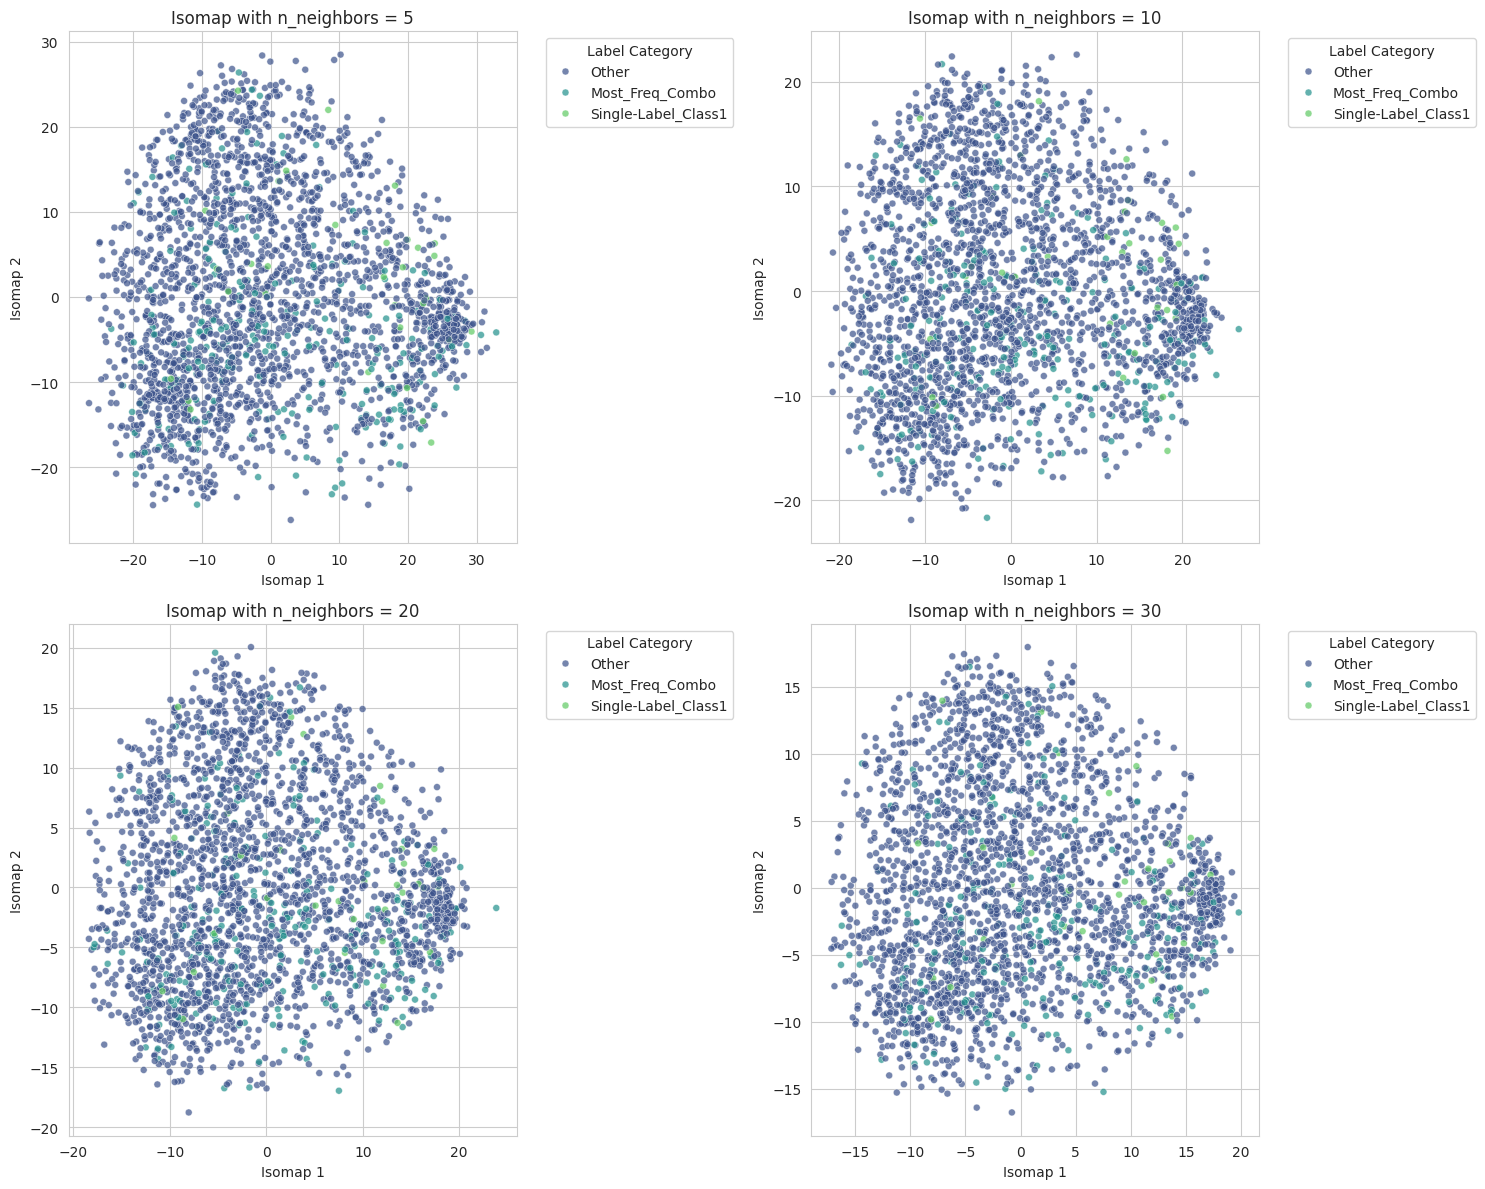

In [30]:
n_neighbors_values = [5, 10, 20, 30]
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, n_neighbors in enumerate(n_neighbors_values):
    isomap = Isomap(n_components=2, n_neighbors=n_neighbors)
    X_isomap = isomap.fit_transform(X_scaled)

    row = i // 2
    col = i % 2
    ax = axes[row, col]

    isomap_df = pd.DataFrame(X_isomap, columns=['Isomap-1', 'Isomap-2'])
    isomap_df['label'] = visual_labels

    sns.scatterplot(
        x='Isomap-1', y='Isomap-2',
        hue='label',
        palette='viridis',
        data=isomap_df,
        ax=ax,
        alpha=0.7,
        s=25
    )
    ax.set_title(f"Isomap with n_neighbors = {n_neighbors}")
    ax.set_xlabel('Isomap 1')
    ax.set_ylabel('Isomap 2')
    ax.legend(title='Label Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Here, first, various values of n_neighbours, a hyperparameter for Isomap is tried out to select the fit**

**Selection of the best fit (n = 10)** from the plots above

- n_neighbors = 5: This value is too small. The plot appears fragmented and noisy. The algorithm is focusing too much on extremely local relationships, which are likely influenced by noise and measurement errors rather than the true global structure. The groups are not well-defined, and the overall shape is less clear.

- n_neighbors = 10: This value strikes a good balance. The plot reveals a coherent, curved manifold shape (a "C" or "horseshoe"), suggesting the true global structure of the data. The groups are reasonably well-defined, and the plot is less fragmented than the one with n=5. It effectively captures the overall geometry without being overly influenced by local noise.

- n_neighbors = 20 & 30: These larger values lead to a more "compressed" or collapsed representation. The algorithm considers too many neighbors, which can cause the manifold to be "short-circuited." The subtle curvature seen at n=10 becomes less defined, and the distinct clusters start to merge into a single, less informative blob. The plot loses some of the fine-grained global structure that was visible at a lower n_neighbors value.

***Hence, we have chosen n_neighbour = 10***.

Isomap reduction complete.


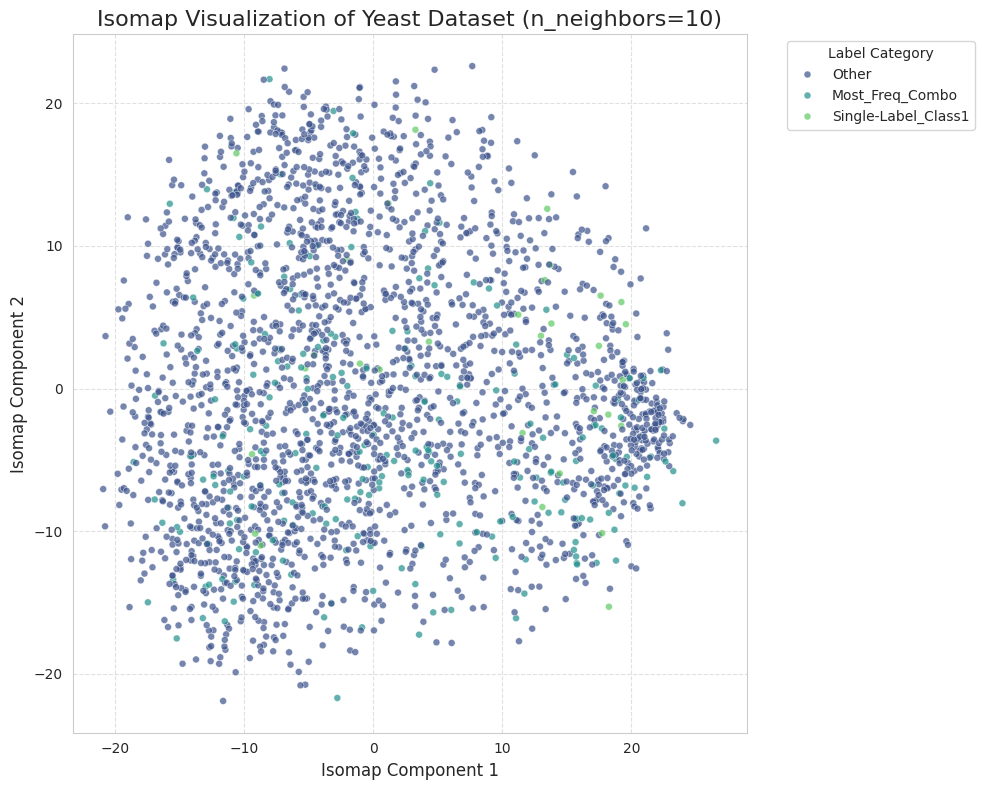

In [31]:
n_neighbors = 10
isomap = Isomap(n_components=2, n_neighbors=n_neighbors)
X_isomap = isomap.fit_transform(X_scaled)
print("Isomap reduction complete.")

isomap_df = pd.DataFrame(X_isomap, columns=['Isomap-1', 'Isomap-2'])
isomap_df['label'] = visual_labels
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Isomap-1',
    y='Isomap-2',
    hue='label',
    palette='viridis',
    data=isomap_df,
    alpha=0.7,
    s=25
)
plt.title(f'Isomap Visualization of Yeast Dataset (n_neighbors={n_neighbors})', fontsize=16)
plt.xlabel('Isomap Component 1', fontsize=12)
plt.ylabel('Isomap Component 2', fontsize=12)
plt.legend(title='Label Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Method**

- A 2D scatter plot of the Isomap coordinates is created.
- It visualizes the reduced data by coloring each point according to its label, revealing the overall shape and structure of the dataset.

**Inferences from the Isomap plot**

**Observations**
- The data points are not arranged in tight, distinct clusters like you might see with t-SNE. Instead, they form a more continuous, globally connected structure.

- The plot reveals a general "C-shaped" or "horseshoe" distribution of the data, suggesting a complex, non-linear underlying manifold.

- The Other (dark blue) and Most_Freq_Combo (teal) categories are thoroughly mixed, particularly in the central and left-side regions. This intermixing is pervasive and extends across the entire plot.

- The Single-Label_Class1 (light green) data points are somewhat more concentrated in a specific region, primarily on the right side, but they also overlap with the other categories.

**Inferences**
- **Global Structure and Manifold Complexity**: The "C-shaped" structure suggests that the relationships between gene expression profiles are not linear. This confirms that the data lies on a complex, curved manifold, making simple linear classification very difficult. The Isomap algorithm successfully "unrolled" this manifold to reveal its true shape.

- **Data Veracity Challenges**: The extensive mixing of labels, especially between the Other and Most_Freq_Combo categories, indicates ambiguous and hard-to-learn samples. A classifier would struggle to find clear decision boundaries in the original 103-dimensional space because the data points from different categories are geometrically intertwined.

- **Comparison to t-SNE**: Unlike a t-SNE plot, which emphasizes local clusters and can make distances between clusters appear arbitrary, this Isomap plot provides a more faithful representation of the global distances. The fact that Single-Label_Class1 is located far from the main bulk of the data suggests that these genes have expression profiles that are globally distinct from the others.

# C 3) Comparison and Curvature:

**1. Comparison of Isomap and t-SNE Visualizations**
- The t-SNE plot  excels at showing local structure, as evidenced by the distinct, though highly intermixed, clusters of data points.

- This visualization is ideal for identifying local neighborhoods, outliers, and areas where labels are ambiguous. However, the distances between these clusters are arbitrary and don't reflect the true global relationships.

- The Isomap plot  reveals a global, continuous structure. The data points form a clear "C-shaped" or "horseshoe" manifold, indicating that the relationships between gene expression profiles are non-linear. This plot is better for understanding the overall geometry and connectivity of the dataset.

- **Conclusion: The Isomap visualization is better at revealing the global structure of the gene expression data. It provides a more accurate view of the data's underlying manifold by preserving the large-scale distances between data points.**

**2. The Data Manifold**
- The data manifold is the underlying low-dimensional space on which the high-dimensional data points lie. It is thought of as a crumpled sheet of paper (the manifold) in a 3D room (the high-dimensional space).

- Ts a mathematical concept that describes a space that is locally similar to Euclidean space but may have a different global structure.

- Based on the Isomap plot, the data suggests a highly curved and complex manifold.

- The distinct "C-shaped" form is a strong visual indicator of non-linear relationships.

**3. Complexity of Classification**
The complexity of this manifold directly relates to the difficulty of classification:

- Complex manifolds mean that the decision boundaries required to separate different classes are also highly non-linear.

- A simple classifier, like a logistic regression or a linear SVM, would struggle immensely because it can only draw straight lines or flat planes.

**4. Data Veracity issue**

- The intertwined nature of the Other and Most_Freq_Combo labels on the manifold shows that even with a perfect non-linear projection, these categories are not well-separated.

- This is a fundamental data veracity issue that a classifier cannot easily overcome, leading to low accuracy and high model uncertainty in these regions.

# Additional analysis: Pair plot generation for original features, tSNE and Isomap.

This plot is made to validate dimensionality reduction: It helps confirm if the dimensionality reduction technique (t-SNE or Isomap) has successfully captured a new, meaningful data structure. By plotting the reduced dimensions against the original features, we can see if the patterns in the reduced space are driven by a single dominant feature or by the complex interplay of multiple features.

It also helps in exploratory analysis: The plot allows us to simultaneously look for correlations, clustering, and outliers from multiple perspectives in a single visualization.

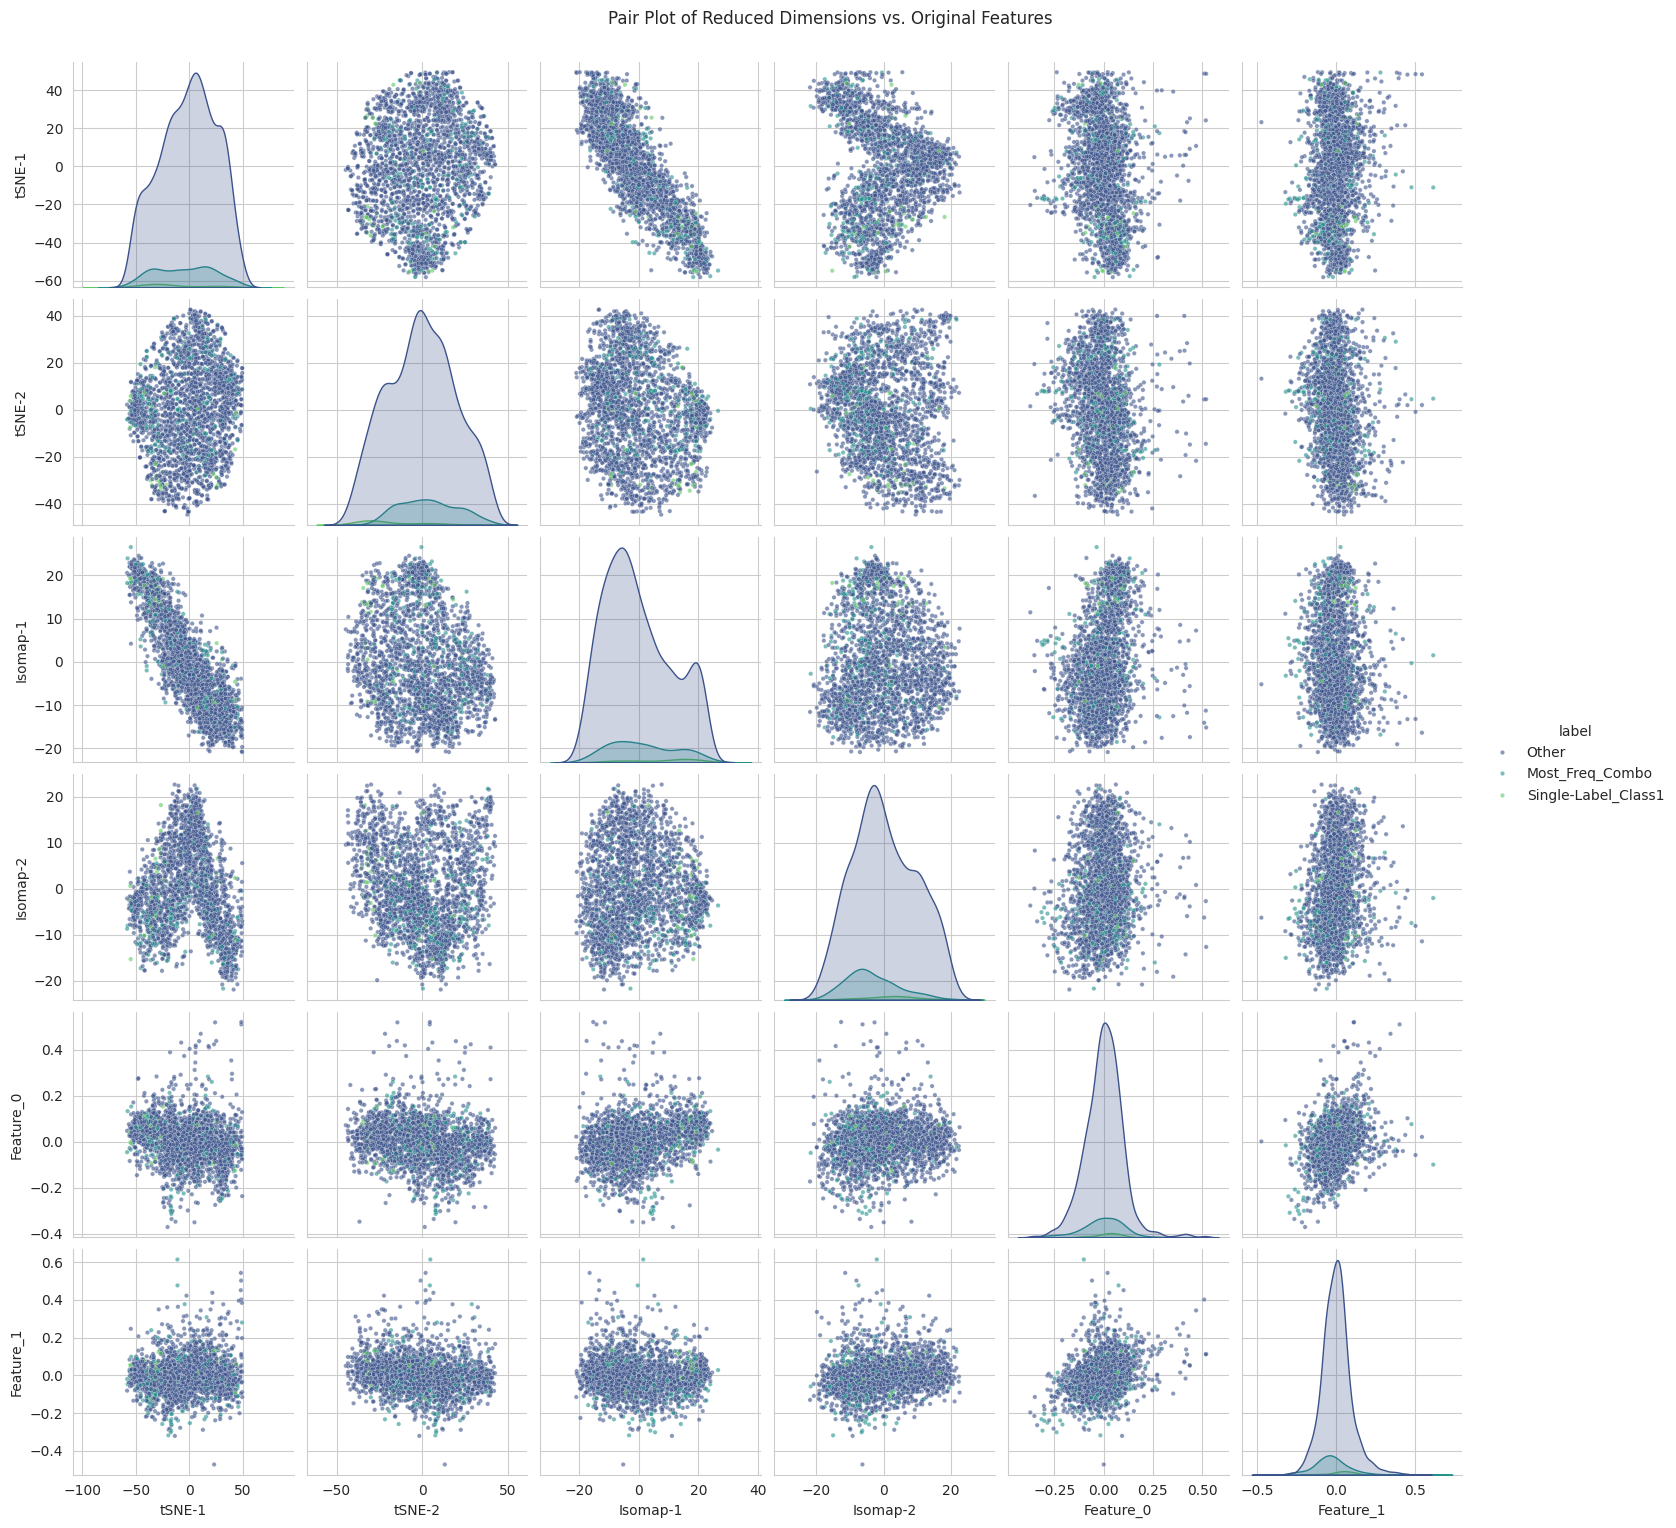

In [32]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X_scaled)

most_freq_features_indices = [0, 1]
feature_names = [f'Feature_{i}' for i in most_freq_features_indices]

combined_df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
combined_df = combined_df.iloc[:, most_freq_features_indices]
combined_df['tSNE-1'] = X_tsne[:, 0]
combined_df['tSNE-2'] = X_tsne[:, 1]
combined_df['Isomap-1'] = X_isomap[:, 0]
combined_df['Isomap-2'] = X_isomap[:, 1]
combined_df['label'] = visual_labels

sns.set_style("whitegrid")
g = sns.pairplot(
    combined_df,
    hue='label',
    palette='viridis',
    vars=['tSNE-1', 'tSNE-2', 'Isomap-1', 'Isomap-2', 'Feature_0', 'Feature_1'],
    plot_kws={'alpha': 0.6, 's': 10}
)
g.fig.suptitle('Pair Plot of Reduced Dimensions vs. Original Features', y=1.02)
plt.show()

# Useful Inferences from the above pair plot

1. **t-SNE vs. Isomap vs. Original Features:**

- **The plots of the reduced dimensions (t-SNE and Isomap) show more distinct patterns and are better at separating the categories compared to the original features (Feature_0 and Feature_1).**
- **This suggests that both t-SNE and Isomap successfully found a non-linear structure in the data that simple linear features alone cannot reveal.**
- The plot highlights the value of using dimensionality reduction for uncovering hidden relationships.


2. **The Power of Dimensionality Reduction:**

- The scatter plots in the lower right-hand corner show the relationship between Feature_0 and Feature_1. The data points are a dense, mixed blob, making it almost impossible to distinguish between the different categories.
- **In contrast, the plots involving the t-SNE and Isomap components show more structure and visual separation of the labels.**
- This clearly demonstrates how these techniques can simplify a complex visualization and reveal underlying patterns.


3. **Understanding the Driving Features**:

- By examining the plots in the last two rows, we can see how the original features relate to the reduced dimensions.
- For example, tSNE-1 and Isomap-1 show a strong correlation with Feature_0 and a less distinct pattern with Feature_1.
- This suggests that Feature_0 is a significant contributor to the first component of both the t-SNE and Isomap reductions, indicating that it plays a crucial role in defining the global structure of the data.

# Summary

- The assignment uses t-SNE and Isomap to visually analyze a high-dimensional yeast gene expression dataset.

- The t-SNE plot reveals local clusters and a high degree of intermixing, indicating noisy data and ambiguous labels that make classification difficult.

- The Isomap plot shows a global, continuous "C-shaped" manifold, confirming that the data has a complex, non-linear structure.

- By comparing the two, we conclude that Isomap is better at revealing global structure, and both visualizations confirm that data veracity issues, not just the model choice, are the primary challenge for classification.